# Question: Does age of rider affect the ride duration of Citi Bike trips?

## Alternative hypothesis: There is a negative correlation between age of riders and trip duration, with a .05 confidence level.
    
## Null hypothesis: Age and trip duration are inversely related at less than a .05 confidence interval OR there is no apparent relationship OR there is a positive relationship.

In [4]:
from __future__  import print_function, division
import os
import statsmodels.api as sm
import pylab as pl

import pandas as pd
import scipy
import numpy as np
%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import json
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [5]:
get_ipython().system("curl -O 'https://s3.amazonaws.com/tripdata/201601-citibike-tripdata.zip'")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16.9M  100 16.9M    0     0  23.1M      0 --:--:-- --:--:-- --:--:-- 28.5M


In [32]:
get_ipython().system('unzip 201601-citibike-tripdata.zip')

In [20]:
df = pd.read_csv('201601-citibike-tripdata.csv')

In [21]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [22]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [23]:
df.drop([u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'gender'], axis=1, inplace=True)

In [24]:
df.head()
# gender 1 is male, 2 is female

,tripduration,birth year
0,923,1958.0
1,379,1969.0
2,589,1982.0
3,889,1961.0
4,1480,1952.0


In [25]:
df['age'] = 2016 - df['birth year']
# df['age'].dropna(inplace= True)
# df['tripduration'].dropna(inplace= True)
# dropping NaN later instead

x = df['age']
y = df['tripduration']

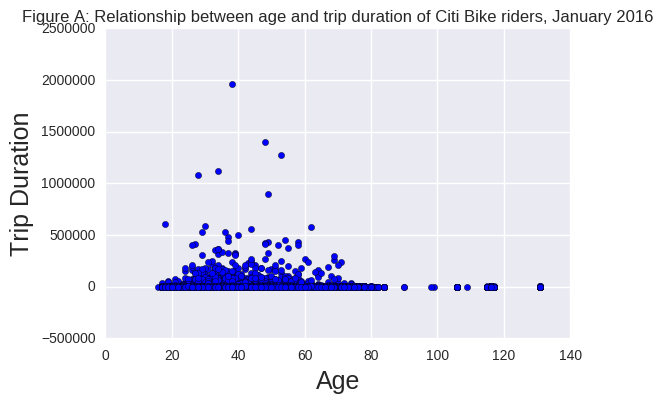

In [26]:
pl.scatter(x, y)

pl.xlabel('Age', fontsize = 18)
pl.ylabel('Trip Duration', fontsize = 18)
pl.title('Figure A: Relationship between age and trip duration of Citi Bike riders, January 2016')

In [27]:
# dropping NaN
array1 = x.dropna().values
len(array1)

484933

In [28]:
array2 = y.dropna().values
len(array2)

509478

In [29]:
array3 = np.random.choice(array2, 484933, replace = False)
len(array3)

484933

In [30]:
array1 = sorted(array1, key=int)
array3 = sorted(array3, key=int)

In [31]:
correlation = scipy.stats.pearsonr(array1, array3)
print (correlation)

(0.20571583536614171, 0.0)


# We cannot reject the null hypothesis. The Pearson test showed a correlation coefficient of .21 with a p-value of 0.0, meaning we can be confident that the two variables have a slight positive correlation. As age goes up, so does trip duration.

In [33]:
get_ipython().system("curl -O 'https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip'")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32.9M  100 32.9M    0     0  29.1M      0  0:00:01  0:00:01 --:--:-- 34.6M


In [34]:
os.path.isfile("201507-citibike-tripdata.zip")

True

In [35]:
os.system("mv " + "201507-citibike-tripdata.zip " + os.getenv("PUIDATA"))

0

In [36]:
os.path.isfile("201507-citibike-tripdata.zip"), os.path.isfile(os.getenv("PUIDATA") + "/201507-citibike-tripdata.zip")

(False, True)

In [37]:
os.system("unzip " + os.getenv("PUIDATA") + "/201507-citibike-tripdata.zip")

256

In [38]:
print("unzip " + os.getenv("PUIDATA") + "/201507-citibike-tripdata.zip")

unzip /home/cusp/akd361/PUIdata/201507-citibike-tripdata.zip


In [39]:
os.path.isfile("201507-citibike-tripdata.csv")

True

In [40]:
os.path.isfile(os.getenv("PUIDATA") + "/201507-citibike-tripdata.csv")

False

In [41]:
os.system("mv " + "201507-citibike-tripdata.csv " + os.getenv("PUIDATA"))

0

In [42]:
os.path.isfile(os.getenv("PUIDATA") + "/201507-citibike-tripdata.csv")

True

In [44]:
df2 = pd.read_csv(os.getenv("PUIDATA") + '/201507-citibike-tripdata.csv')
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1


In [45]:
df2.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [46]:
df2.drop([u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'gender'], axis=1, inplace=True)

In [47]:
df2.head()

,tripduration,birth year
0,732,1970.0
1,322,1984.0
2,790,1992.0
3,1228,1990.0
4,1383,1988.0


In [48]:
df2['age'] = 2015 - df2['birth year']

x2 = df2['age']
y2 = df2['tripduration']

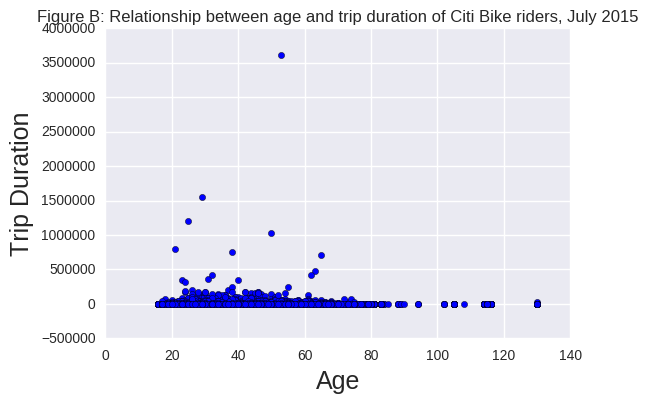

In [56]:
# notice the distribution looks the same as figure A
pl.scatter(x2, y2)

pl.xlabel('Age', fontsize = 18)
pl.ylabel('Trip Duration', fontsize = 18)
pl.title('Figure B: Relationship between age and trip duration of Citi Bike riders, July 2015')

In [51]:
# removing NaN
arrayx2 = x2.dropna().values
arrayy2 = y2.dropna().values

In [52]:
array4 = np.random.choice(arrayy2, 905311, replace = False)
len(array4)

905311

In [53]:
len(arrayx2)

905311

In [54]:
arrayx2 = sorted(arrayx2, key=int)
array4 = sorted(array4, key=int)

In [55]:
correlation = scipy.stats.pearsonr(arrayx2, array4)
print (correlation)

(0.2079136280590953, 0.0)


# These results back up those we got from the first sample. We have a correlation coefficient of .21 (same as previous test) and again, a p-value of 0.0. For Citi Bike riders in both January and July, age and trip duration have a slight positive correlation. The Null stands.